In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
dataset = pd.read_csv('./FishWeight.csv')  
dataset.head()

,Length1,Length2,Length3,Height,Width,Weight
0,23.2,25.4,30.0,11.5200,4.0200,242.0
1,24.0,26.3,31.2,12.4800,4.3056,290.0
2,23.9,26.5,31.1,12.3778,4.6961,340.0
3,26.3,29.0,33.5,12.7300,4.4555,363.0
4,26.5,29.0,34.0,12.4440,5.1340,430.0


In [3]:
#Show Key Statistics
dataset.describe()

,Length1,Length2,Length3,Height,Width,Weight
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,26.247170,28.415723,31.227044,8.970994,4.417486,398.326415
std,9.996441,10.716328,11.610246,4.286208,1.685804,357.978317
min,7.500000,8.400000,8.800000,1.728400,1.047600,0.000000
25%,19.050000,21.000000,23.150000,5.944800,3.385650,120.000000
50%,25.200000,27.300000,29.400000,7.786000,4.248500,273.000000
75%,32.700000,35.500000,39.650000,12.365900,5.584500,650.000000
max,59.000000,63.400000,68.000000,18.957000,8.142000,1650.000000


In [4]:
#Boxplot Visualization
plt.figure(figsize=(15,10))
sns.boxplot(data=dataset)

<Axes: >

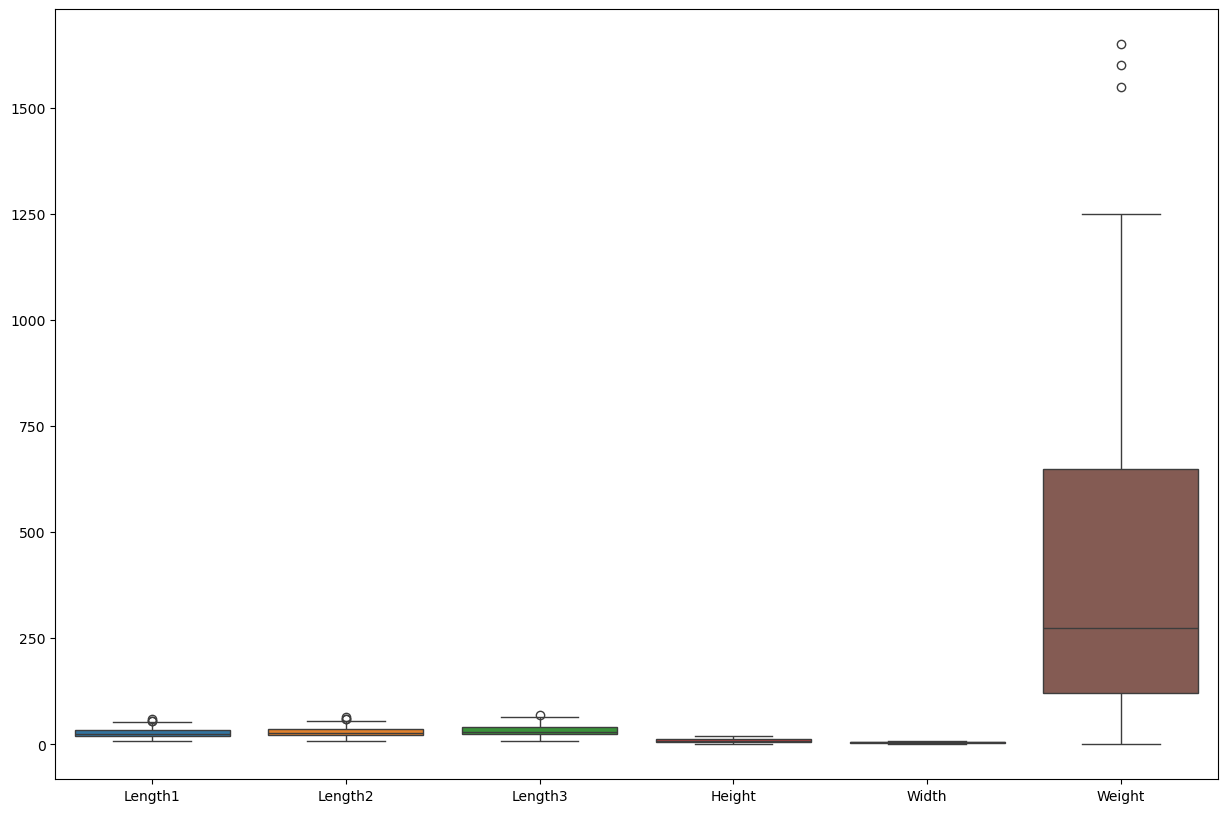

In [5]:
plt.show()

Length1


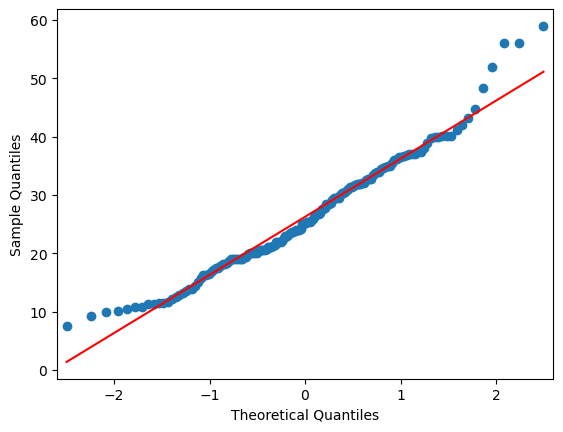

Length2


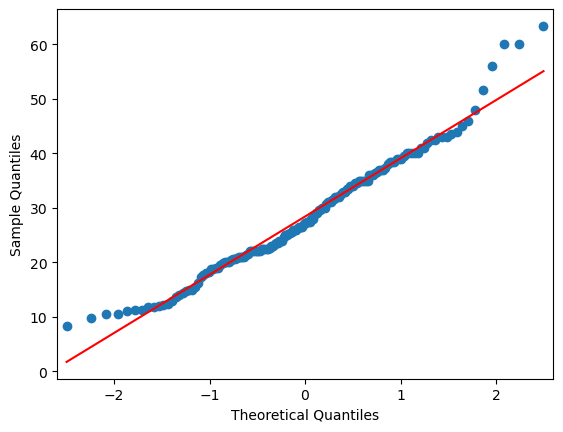

Length3


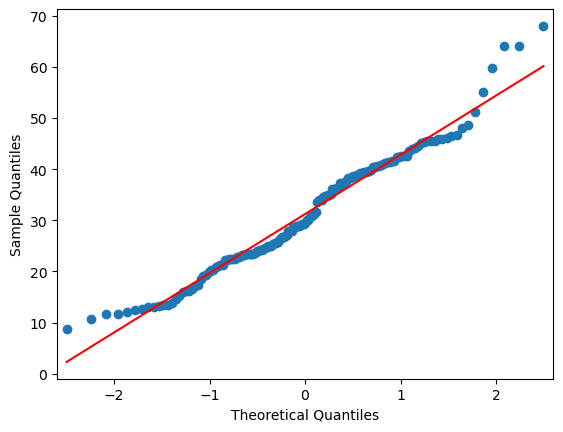

Height


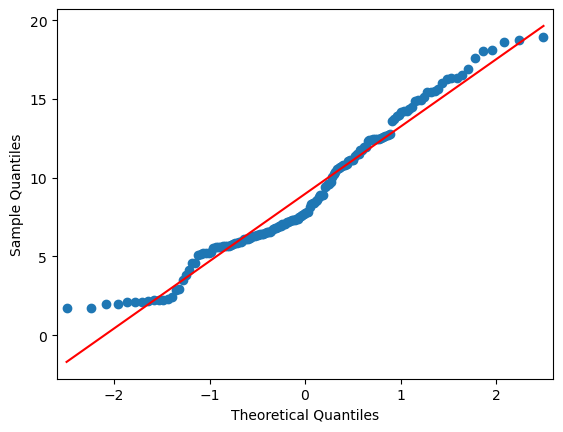

Width


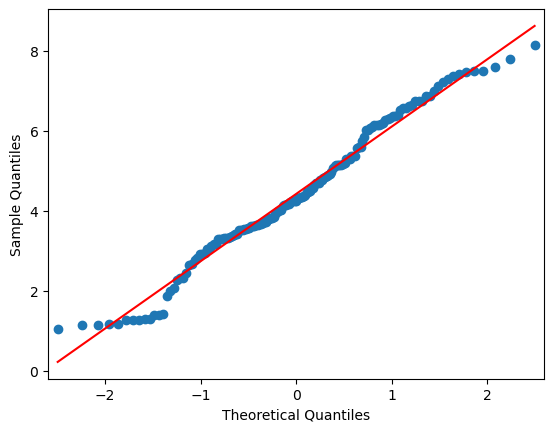

Weight


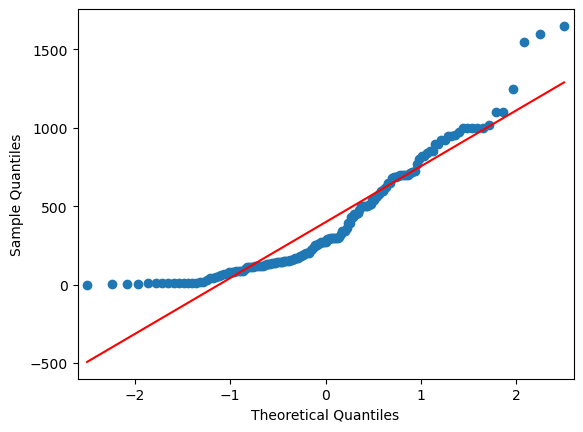

In [6]:
#Create QQ Plots

from statsmodels.graphics.gofplots import qqplot
import pylab

cnt = 1
for col in dataset.columns:
    print(col)
    qqplot(dataset[col],line='s')
    pylab.show()
    cnt += 1    

In [7]:
#Scatterplots - Weight vs. Independent Variables

plt.figure(figsize = (15, 20))

cnt = 1
for col in dataset.columns:
    if (col == 'Weight'):
        continue
    
    plt.subplot(5, 2, cnt)
    lmgraph = sns.regplot(x = dataset[col], y = dataset.Weight)
    lmgraph.set_xlabel(col)
    lmgraph.set_ylabel('Weight')
    cnt += 1  

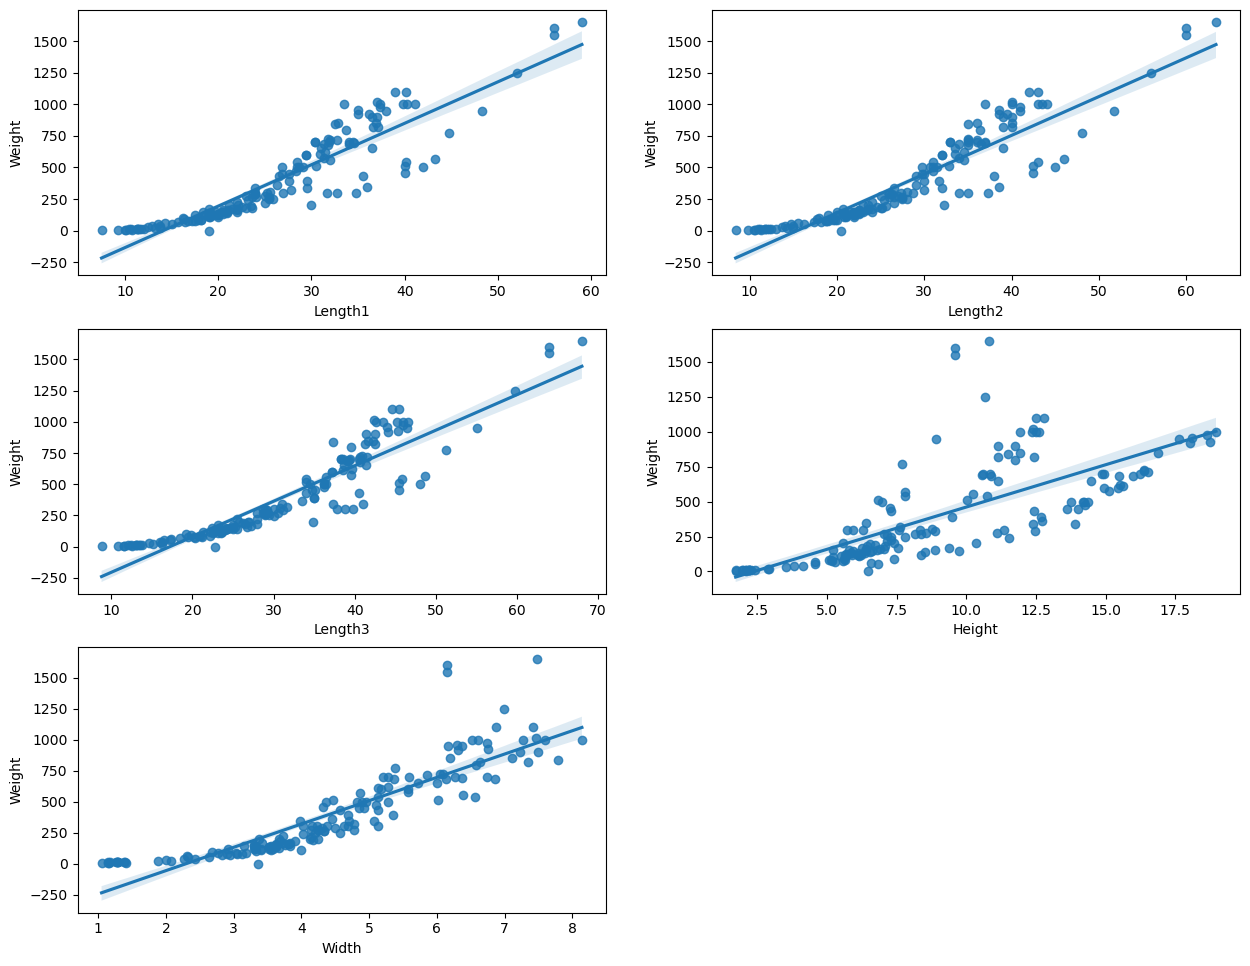

In [8]:
plt.show()

In [9]:
#Histogram with Distribution 

plt.figure(figsize = (15, 20))

cnt = 1
for col in dataset.columns:
    lmgraphhist = sns.displot(x = dataset[col],kde=True)
    cnt += 1   

<Figure size 1500x2000 with 0 Axes>

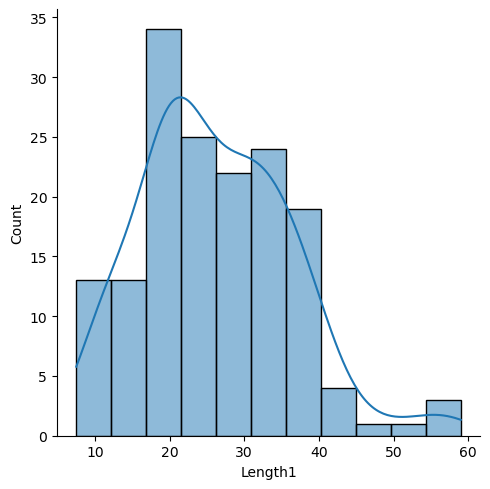

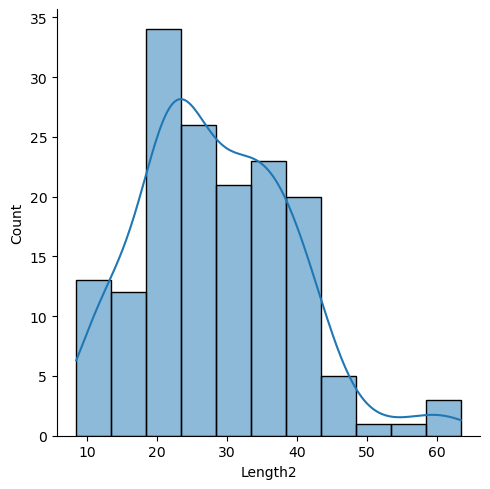

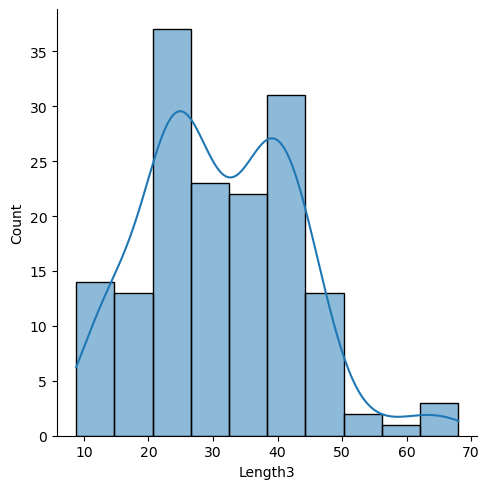

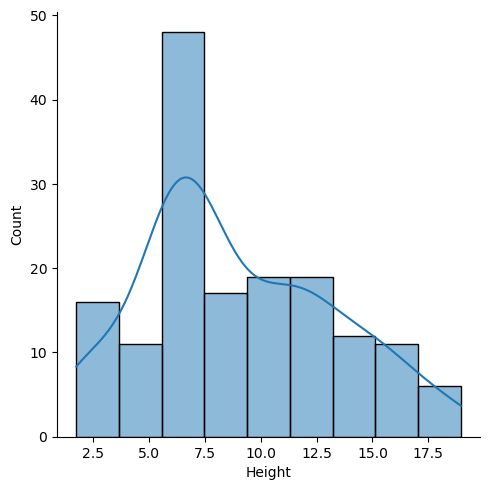

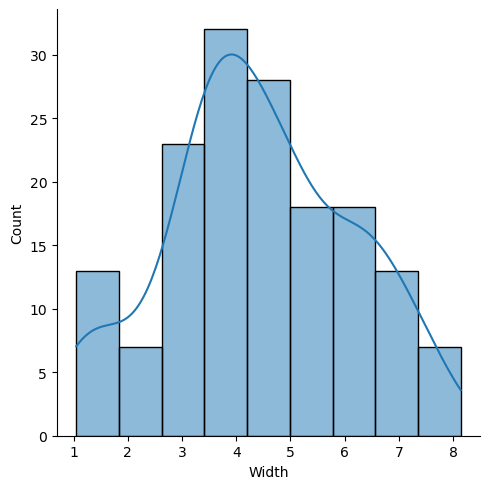

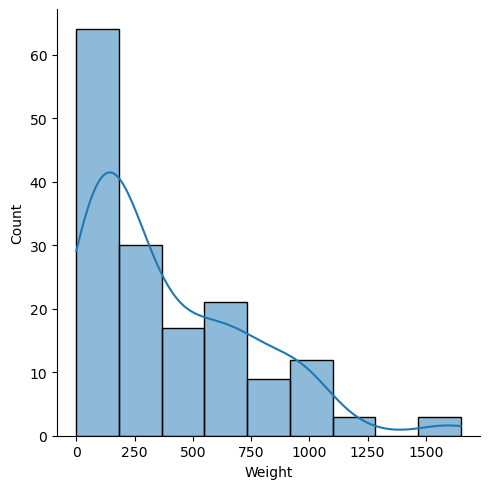

In [10]:
plt.show()

In [11]:
#Visualization of Correlations
fig = plt.figure(figsize=(15,5))
sns.heatmap(dataset.corr(),annot=True,cmap="Blues")

<Axes: >

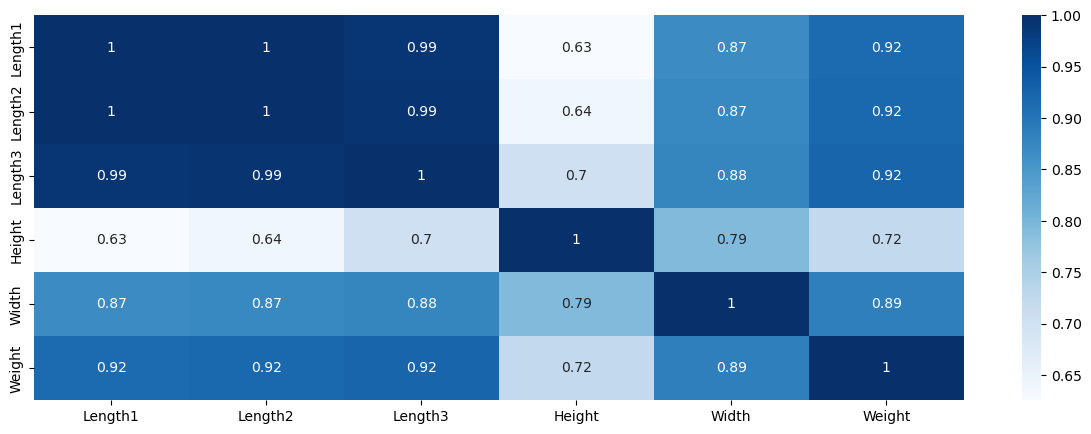

In [12]:
plt.show()

In [14]:
#Create x and y variables
x = dataset.drop('Weight',axis=1).to_numpy()
y = dataset['Weight'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [15]:
#Script for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics  
from sklearn.metrics import r2_score

for name,method in [('Linear Regression', LinearRegression())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('Method: {}'.format(name))   

#Coefficents
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),
                         dataset.drop('Weight',axis=1).columns,columns=['Coefficients'])
print('\n')
print(coeff_table)
    
#MAE,MSE and RMSE
print('\nR2: {:0.2f}'.format(r2_score(y_test, predict)))
adjusted_r_squared2 = 1-(1-metrics.r2_score(y_test,predict))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared2))

print('\nMean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 

Method: Linear Regression

Intercept: 391.49


         Coefficients
Length1    730.194257
Length2   -278.055260
Length3   -222.638571
Height      90.630688
Width       50.133149

R2: 0.90
Adj_R2: 0.90

Mean Absolute Error: 94.67
Mean Squared Error: 12283.93
Root Mean Squared Error: 110.83


In [16]:
#Forecast Table
predict2 = predict.T
diff = predict2-y_test
FcstTble=pd.DataFrame({'Actual':y_test,'Predicted':predict2.round(2),'Difference':diff.round(2)})
print('\nForecast Table')
FcstTble.head()


Forecast Table


,Actual,Predicted,Difference
0,160.0,184.37,24.37
1,500.0,545.15,45.15
2,1000.0,949.31,-50.69
3,600.0,598.18,-1.82
4,390.0,472.28,82.28
